In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:

df = pd.read_csv('shopping_trends.csv')
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [13]:
num = df.select_dtypes(exclude='object')
obj = df.select_dtypes(include='object')



In [16]:
# df_combined = pd.concat([num,obj], axis=1)
df_combined = num.join(obj)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Purchase Amount (USD)     3900 non-null   int64  
 3   Review Rating             3900 non-null   float64
 4   Previous Purchases        3900 non-null   int64  
 5   Gender                    3900 non-null   object 
 6   Item Purchased            3900 non-null   object 
 7   Category                  3900 non-null   object 
 8   Location                  3900 non-null   object 
 9   Size                      3900 non-null   object 
 10  Color                     3900 non-null   object 
 11  Season                    3900 non-null   object 
 12  Subscription Status       3900 non-null   object 
 13  Payment Method            3900 non-null   object 
 14  Shipping

In [51]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# **Market Research-EDA**

In [18]:
# 1 Customer Segmentation Analysis

# Age-based spending patterns
df.groupby(['Age'])['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Gender-based category preferences
pd.crosstab(df['Gender'], df['Category'])


Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


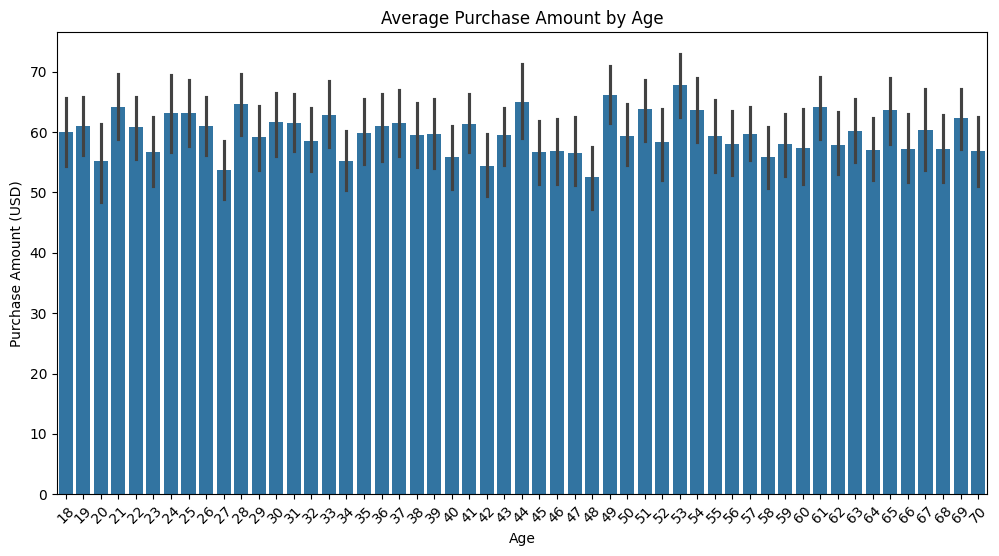

<Figure size 1200x600 with 0 Axes>

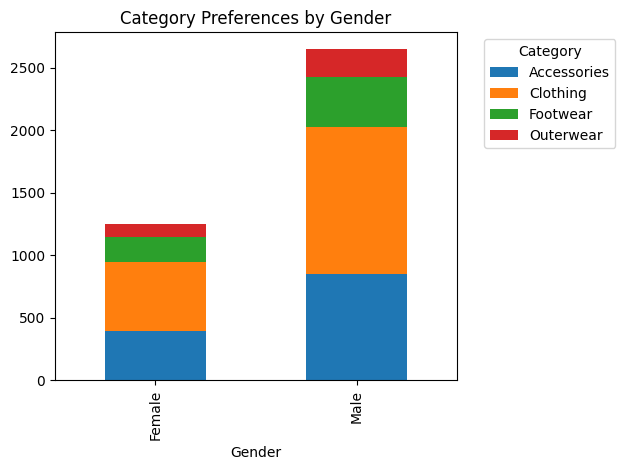

In [ ]:


# Age-based spending patterns
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Age', y='Purchase Amount (USD)')
plt.title('Average Purchase Amount by Age')
plt.xticks(rotation=45)
plt.show()

# Gender-based category preferences
gender_category = pd.crosstab(df['Gender'], df['Category'])
plt.figure(figsize=(12, 6))
gender_category.plot(kind='bar', stacked=True)
plt.title('Category Preferences by Gender')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [20]:
# 2 Seasonal Trends

# Average purchase amount by season
seasonal_analysis = df.groupby('Season')['Purchase Amount (USD)'].agg(['mean', 'count'])

# Most popular categories by season
season_category = pd.crosstab(df['Season'], df['Category'])


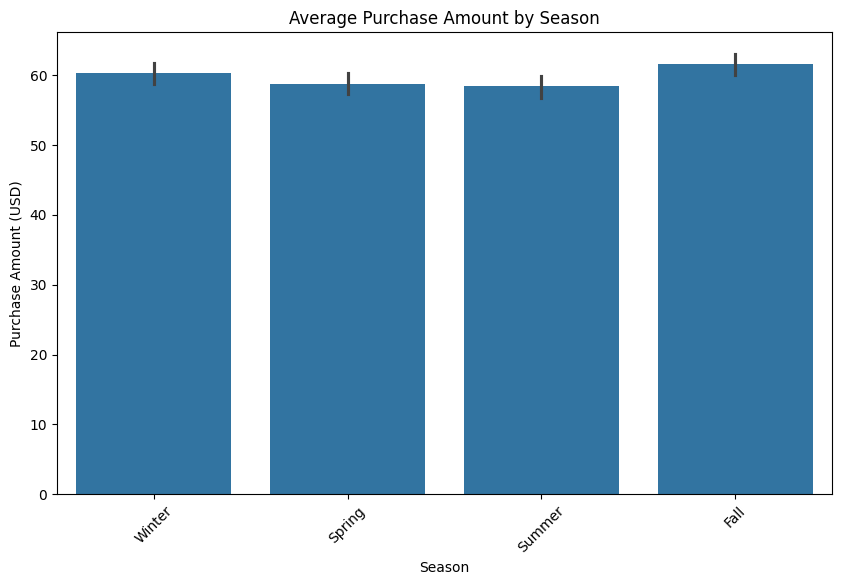

<Figure size 1200x600 with 0 Axes>

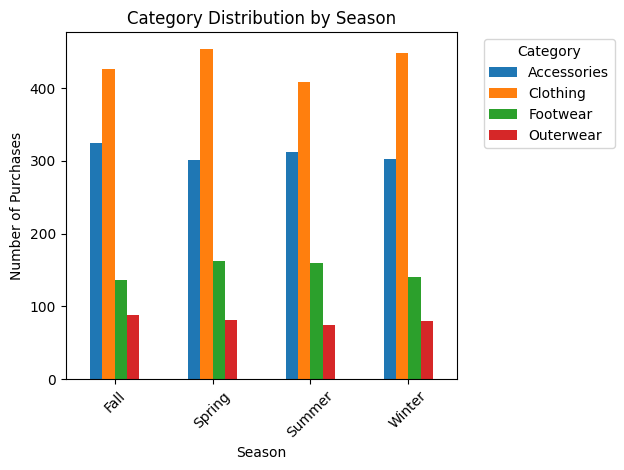

In [46]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)')
plt.title('Average Purchase Amount by Season')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
season_category.plot(kind='bar')
plt.title('Category Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# 3 Loyalty and Purchase Behavior

# Correlation between previous purchases and purchase amount
df[['Previous Purchases', 'Purchase Amount (USD)']].corr()

# Average spending by subscription status
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()


Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

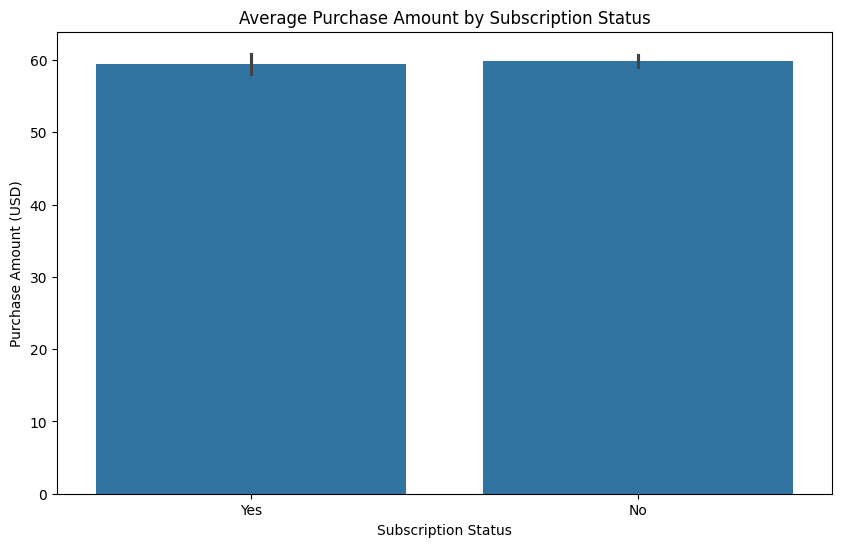

In [44]:
# Correlation visualization
fig = px.density_heatmap(
    df, 
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    title='Correlation: Previous Purchases vs Purchase Amount',
    nbinsx=20,  # Number of bins in x direction
    nbinsy=20,  # Number of bins in y direction
    color_continuous_scale='Viridis',  # Color scheme
    text_auto=True  # Show count in each cell
)

fig.update_layout(
    title_x=0.5,  # Center the title
    width=800,    # Width of the plot
    height=600    # Height of the plot
)
fig.show()

# Subscription status comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Subscription Status', y='Purchase Amount (USD)')
plt.title('Average Purchase Amount by Subscription Status')
plt.show()


In [24]:
# 4 Promotional Effectiveness

# Impact of discounts on purchase amount
df.groupby('Discount Applied')['Purchase Amount (USD)'].agg(['mean', 'count'])

# Promo code usage analysis
promo_impact = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()


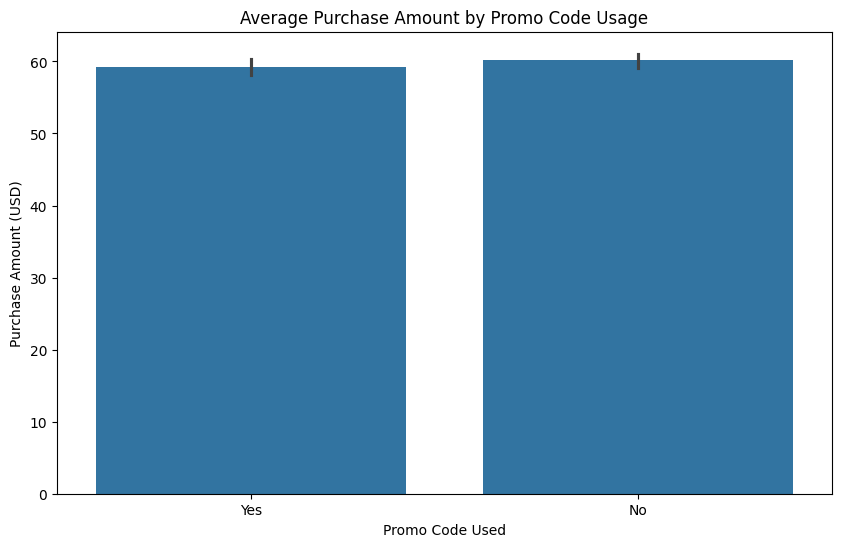

In [43]:
# Discount impact
import plotly.express as px

# Calculate mean purchase amount
discount_summary = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()

# Create interactive bar chart
fig = px.bar(discount_summary, 
             x='Discount Applied', 
             y='Purchase Amount (USD)',
             title='Average Purchase Amount by Discount Status')
fig.show()


# Promo code analysis
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Promo Code Used', y='Purchase Amount (USD)')
plt.title('Average Purchase Amount by Promo Code Usage')
plt.show()


In [41]:
# 5 Geographic Analysis

# Regional preferences in categories
location_category = pd.crosstab(df['Location'], df['Category']).head(10)

# Average spending by location
df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head()


Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Name: Purchase Amount (USD), dtype: float64

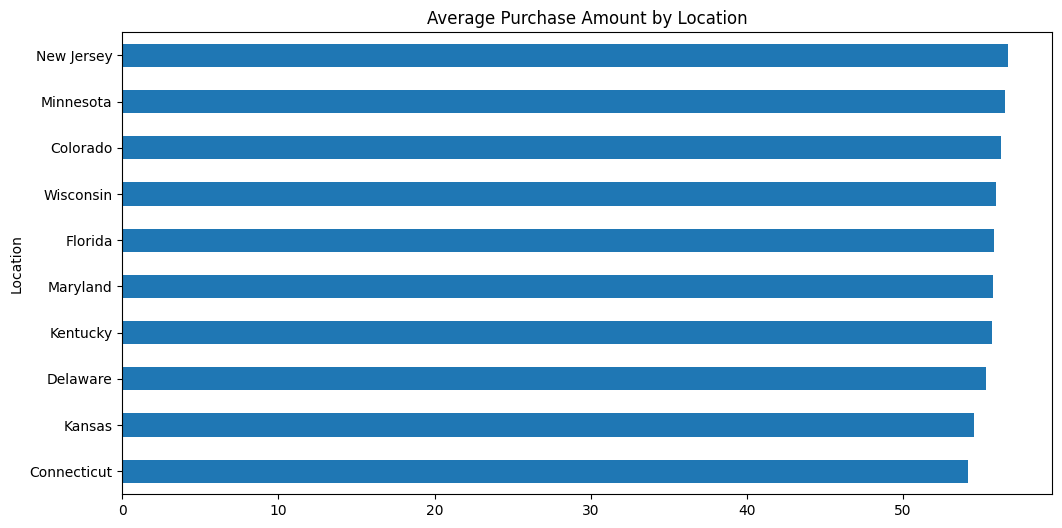

<Figure size 1500x800 with 0 Axes>

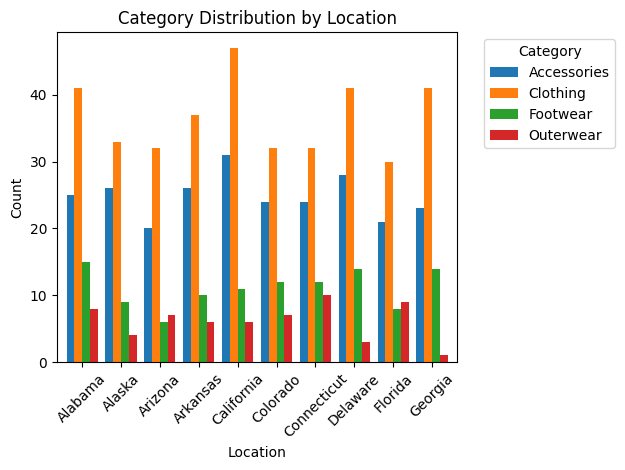

In [42]:
# Regional spending
plt.figure(figsize=(12, 6))
location_spending = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=True).head(10)
location_spending.plot(kind='barh')
plt.title('Average Purchase Amount by Location')
plt.show()

# Convert to grouped bar chart
plt.figure(figsize=(15, 8))
location_category.plot(kind='bar', width=0.8)
plt.title('Category Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [26]:
# 6 Product Performance

# Most popular items by review rating
df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False).head()

# Best-selling items by category
item_category = pd.crosstab(df['Category'], df['Item Purchased'])


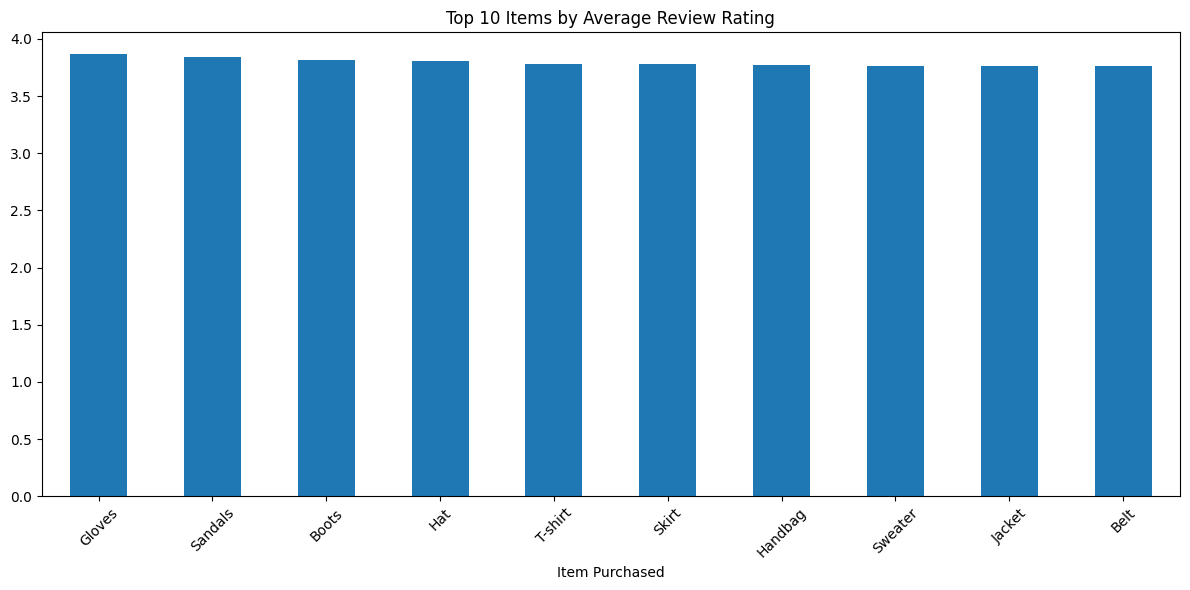

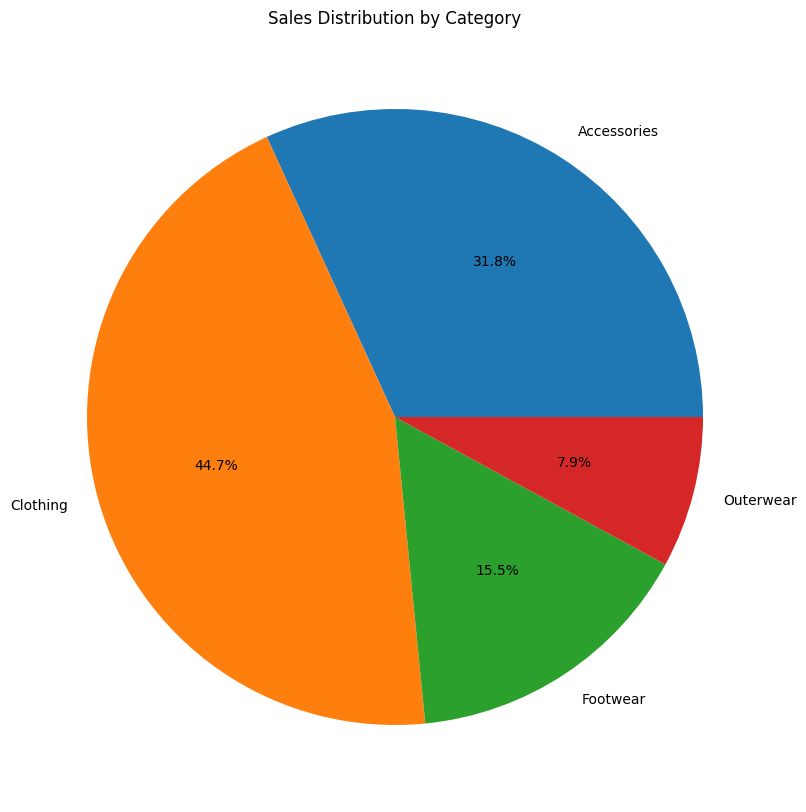

In [37]:
# Top rated items
top_items = df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar')
plt.title('Top 10 Items by Average Review Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Category performance
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(10, 10))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.show()


In [27]:
# 7 Payment Preferences

# Preferred payment methods by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 100], labels=['18-25', '26-35', '36-45', '45+'])
payment_age = pd.crosstab(df['Age_Group'], df['Payment Method'])


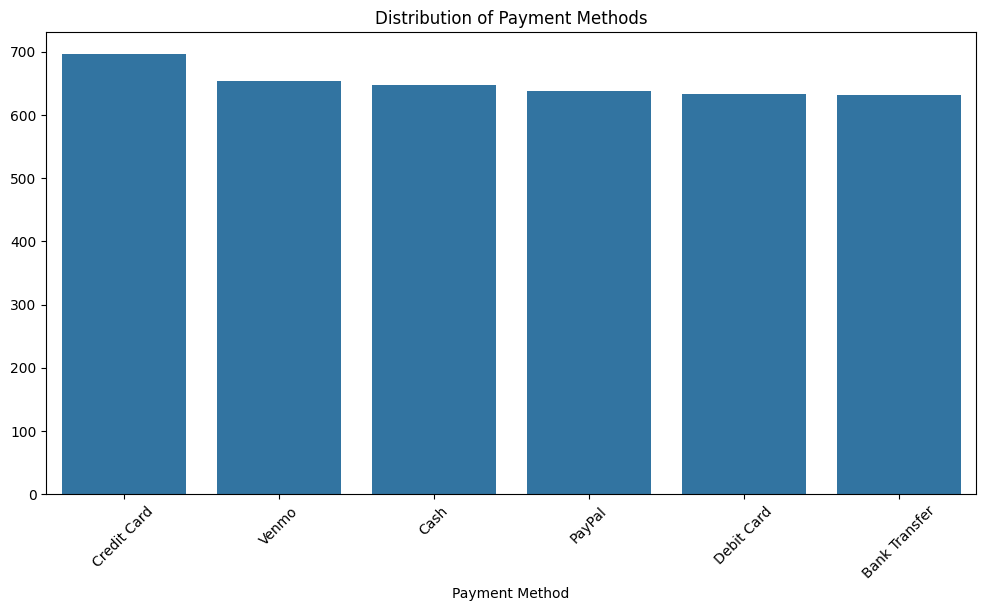

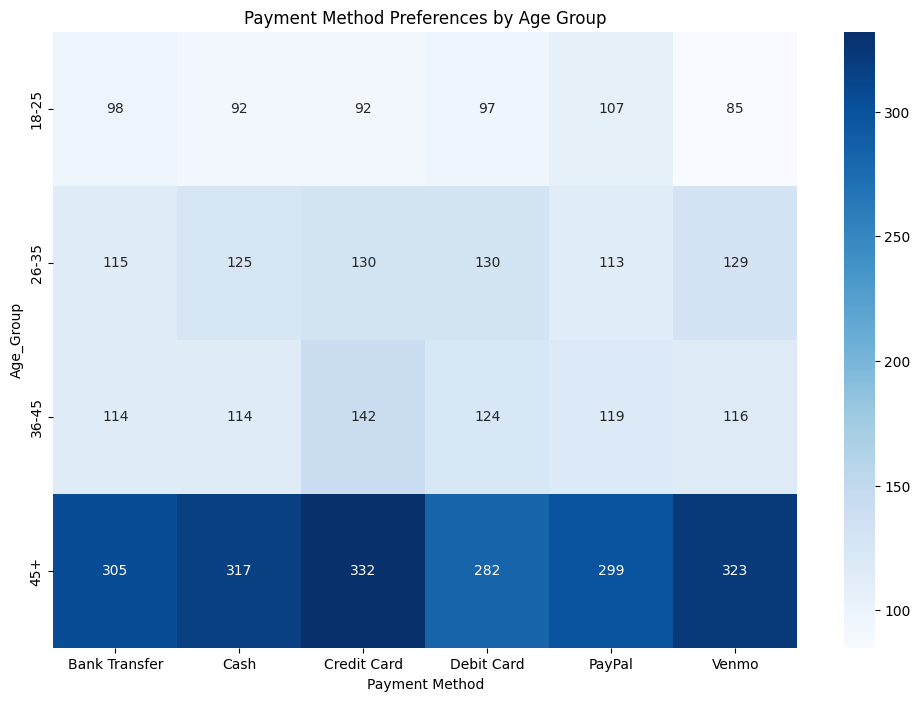

In [38]:
# Payment method distribution
plt.figure(figsize=(12, 6))
payment_counts = df['Payment Method'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)
plt.show()

# Age group payment preferences
payment_age = pd.crosstab(df['Age_Group'], df['Payment Method'])
plt.figure(figsize=(12, 8))
sns.heatmap(payment_age, annot=True, fmt='d', cmap='Blues')
plt.title('Payment Method Preferences by Age Group')
plt.show()


In [52]:
# 8 Customer Value Analysis
# High-value customer characteristics
high_value = df[df['Purchase Amount (USD)'] > df['Purchase Amount (USD)'].quantile(0.75)]
high_value.groupby('Category').size()


Category
Accessories    284
Clothing       424
Footwear       147
Outerwear       71
dtype: int64

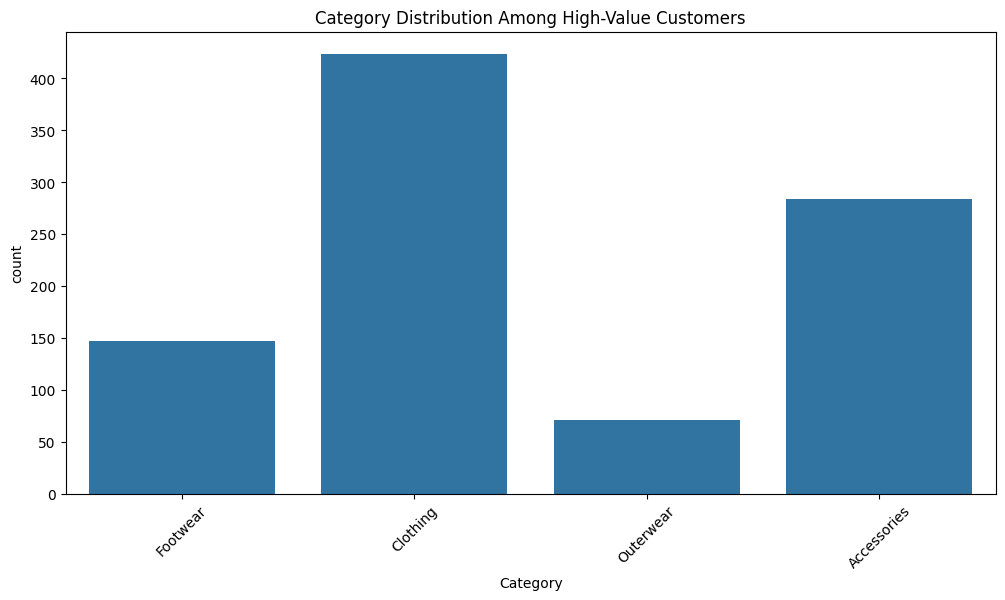

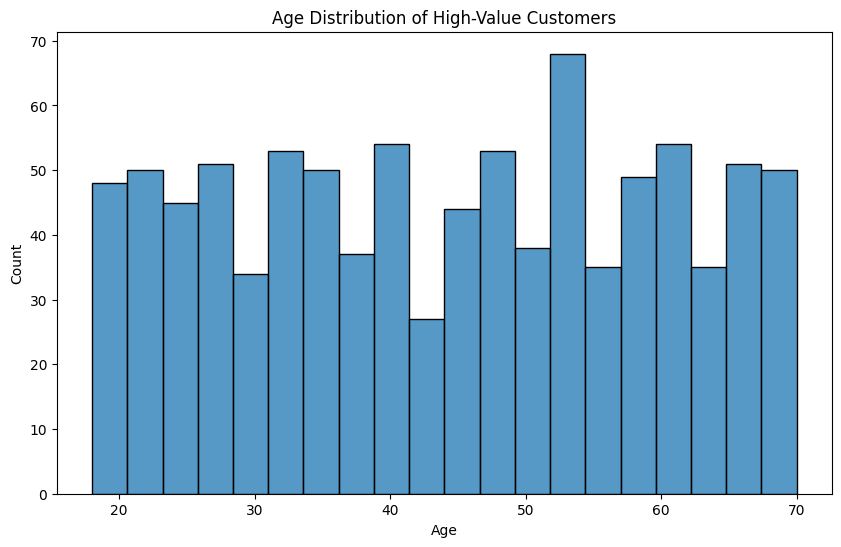

In [39]:
# High-value customer characteristics
plt.figure(figsize=(12, 6))
high_value = df[df['Purchase Amount (USD)'] > df['Purchase Amount (USD)'].quantile(0.75)]
sns.countplot(data=high_value, x='Category')
plt.title('Category Distribution Among High-Value Customers')
plt.xticks(rotation=45)
plt.show()

# Age distribution of high-value customers
plt.figure(figsize=(10, 6))
sns.histplot(data=high_value, x='Age', bins=20)
plt.title('Age Distribution of High-Value Customers')
plt.show()
